In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn.ensemble as skle

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
file_name_train = 'C:\\1_CODE\\Datasets\\House Prices\\train.csv'
file_name_test_x = 'C:\\1_CODE\\Datasets\\House Prices\\test.csv'
file_name_test_y = 'C:\\1_CODE\\Datasets\\House Prices\\test_SalePrice.csv'

In [5]:
train = pd.read_csv(file_name_train)
test_x = pd.read_csv(file_name_test_x)
test_y = pd.read_csv(file_name_test_y)

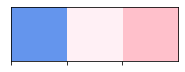

In [6]:
colors = ['cornflowerblue','lavenderblush','pink']
sns.palplot(sns.color_palette(colors))

In [7]:
cmap = sns.diverging_palette(258, 6, n=30, s = 70, l=65)

<details><summary>Click here to view information about columns</summary>

```
SalePrice — the property's sale price in $; target variable that you're predict
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```
   
</details>

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
n = train.shape[0]
n

1460

### Исследование целевого признака

In [257]:
train[['SalePrice']].describe().round(1)

,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


<AxesSubplot:xlabel='SalePrice', ylabel='Probability'>

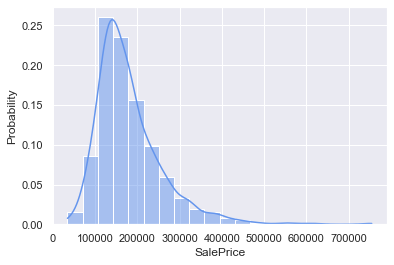

In [259]:
sns.histplot(data=train, x='SalePrice', stat='probability', bins=20, kde=True, color=colors[0])

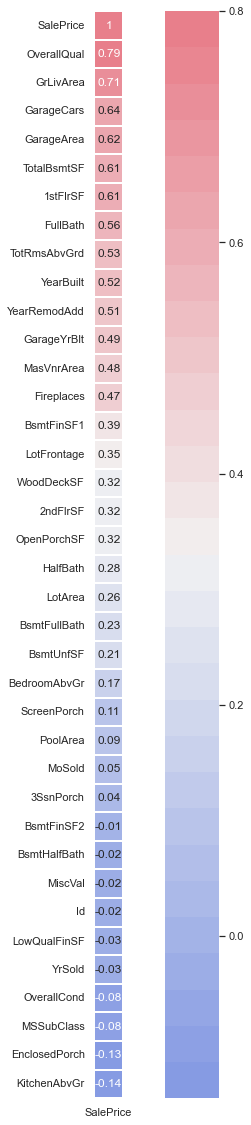

In [260]:
corrmat = train.corr()
corrmat=corrmat.loc[['SalePrice']].T.sort_values(by='SalePrice', ascending=False).round(2)
f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.2, cmap=cmap, annot=True);

---

### Общие сведения о здании
LotShape: общая форма собственности

BldgType: тип жилья

HouseStyle: стиль жилья

MSSubClass: класс здания

MSZoning: общая классификация зонирования

LotArea: размер участка в квадратных футах

LandContour: плоскостность объекта

LotConfig: конфигурация лота

LandSlope: уклон участка

Neighborhood: физические местоположения в черте города Эймс

Utilities: доступные утилиты

In [261]:
for name in ('LotShape', 'BldgType', 'HouseStyle', 'MSSubClass', 
             'MSZoning', 'LotArea', 'LandContour', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Utilities'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака LotShape: 0
Тип признака LotShape: object
Количество пропусков признака BldgType: 0
Тип признака BldgType: object
Количество пропусков признака HouseStyle: 0
Тип признака HouseStyle: object
Количество пропусков признака MSSubClass: 0
Тип признака MSSubClass: int64
Количество пропусков признака MSZoning: 0
Тип признака MSZoning: object
Количество пропусков признака LotArea: 0
Тип признака LotArea: int64
Количество пропусков признака LandContour: 0
Тип признака LandContour: object
Количество пропусков признака LotConfig: 0
Тип признака LotConfig: object
Количество пропусков признака LandSlope: 0
Тип признака LandSlope: object
Количество пропусков признака Neighborhood: 0
Тип признака Neighborhood: object
Количество пропусков признака Utilities: 0
Тип признака Utilities: object


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

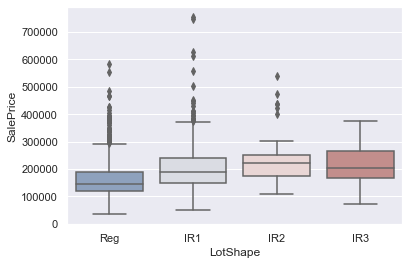

In [72]:
sns.boxplot(data=train, x='LotShape', y='SalePrice', palette="vlag")

In [73]:
train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

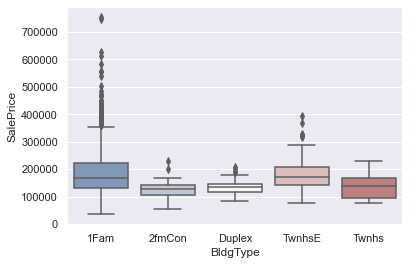

In [74]:
sns.boxplot(data=train, x='BldgType', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

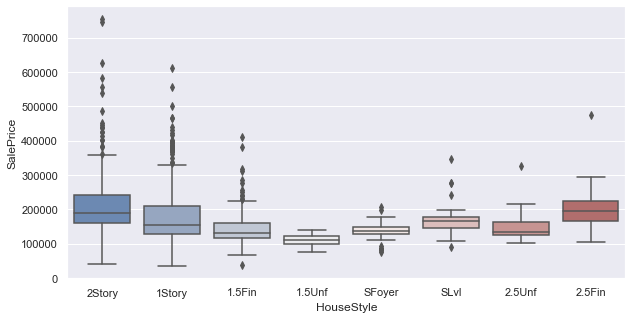

In [76]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='HouseStyle', y='SalePrice', palette="vlag")

In [211]:
train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [77]:
train['HouseStyle'] = train['HouseStyle'].map({'1.5Unf' : 4, 'SFoyer' : 4,
                                               'SLvl' : 3, '2.5Unf' : 3,
                                               '1.5Fin' : 2, '2.5Fin' : 2,
                                               '1Story' : 1, '2Story' : 0}, na_action='ignore')

In [78]:
correlation(train, 'HouseStyle')

Корреляция признаков HouseStyle и SalePrice = -0.26 (слабая)


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

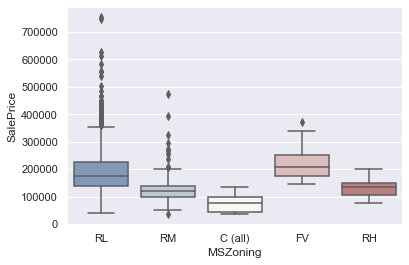

In [79]:
sns.boxplot(data=train, x='MSZoning', y='SalePrice', palette="vlag")

In [214]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

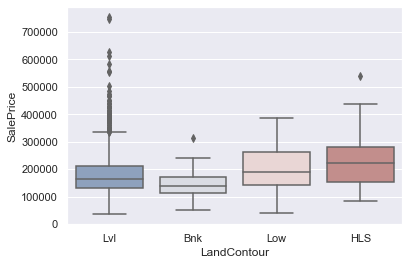

In [87]:
sns.boxplot(data=train, x='LandContour', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

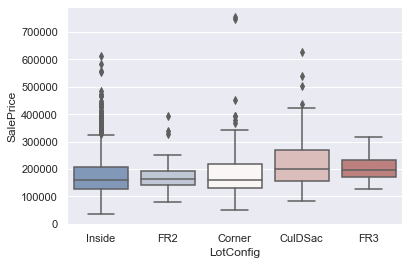

In [88]:
sns.boxplot(data=train, x='LotConfig', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

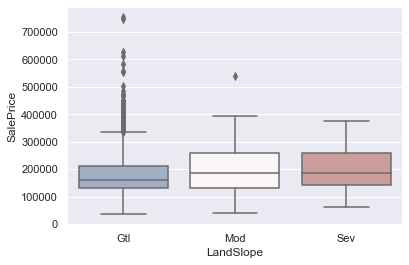

In [89]:
sns.boxplot(data=train, x='LandSlope', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

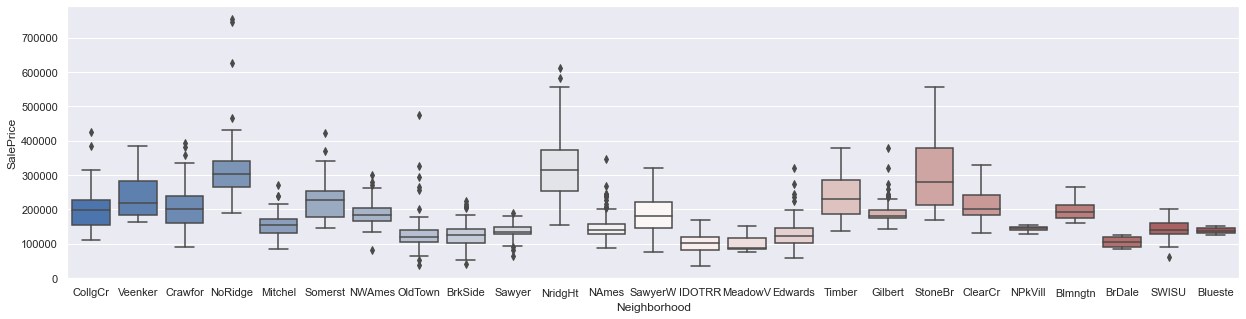

In [91]:
f, ax = plt.subplots(figsize=(21, 5))
sns.boxplot(data=train, x='Neighborhood', y='SalePrice', palette="vlag")

In [100]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [11]:
train['Neighborhood'] = train['Neighborhood'].map({'MeadowV' : 0, 'BrDale' : 0, 'IDOTRR' : 0, 
                                                       'BrkSide' : 1, 'Sawyer' : 1, 'SWISU' : 1,
                                                       'OldTown' : 1, 'NPkVill' : 1, 'Blueste' : 1,
                                                       'Mitchel' : 2, 'NAmes' : 2, 'Edwards' : 2,
                                                       'SawyerW' : 3, 'NWAmes' : 3, 'Gilbert' : 3,
                                                       'CollgCr' : 4, 'Crawfor' : 4, 'ClearCr' : 4,
                                                       'Blmngtn' : 4, 'Timber' : 5, 'Somerst' : 5,
                                                       'Veenker' : 5, 'NoRidge' : 6, 'NridgHt' : 6,
                                                       'StoneBr' : 6}, na_action='ignore')

In [12]:
test_x['Neighborhood'] = test_x['Neighborhood'].map({'MeadowV' : 0, 'BrDale' : 0, 'IDOTRR' : 0, 
                                                       'BrkSide' : 1, 'Sawyer' : 1, 'SWISU' : 1,
                                                       'OldTown' : 1, 'NPkVill' : 1, 'Blueste' : 1,
                                                       'Mitchel' : 2, 'NAmes' : 2, 'Edwards' : 2,
                                                       'SawyerW' : 3, 'NWAmes' : 3, 'Gilbert' : 3,
                                                       'CollgCr' : 4, 'Crawfor' : 4, 'ClearCr' : 4,
                                                       'Blmngtn' : 4, 'Timber' : 5, 'Somerst' : 5,
                                                       'Veenker' : 5, 'NoRidge' : 6, 'NridgHt' : 6,
                                                       'StoneBr' : 6}, na_action='ignore')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

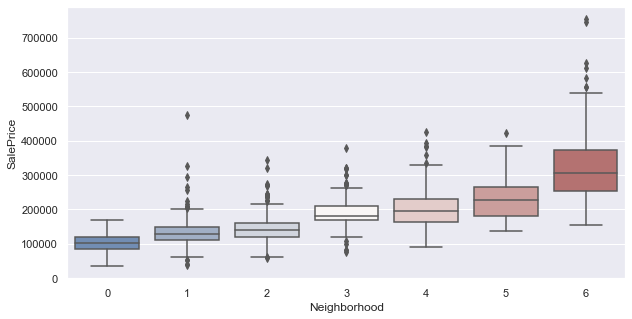

In [104]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='Neighborhood', y='SalePrice', palette="vlag")

In [274]:
correlation(train, 'Neighborhood')

Корреляция признаков Neighborhood и SalePrice = 0.7 (высокая)


<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

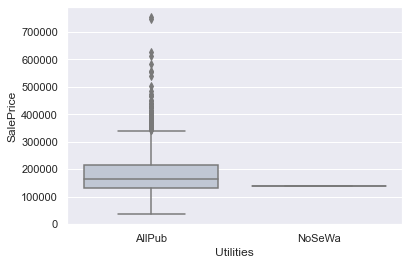

In [92]:
sns.boxplot(data=train, x='Utilities', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

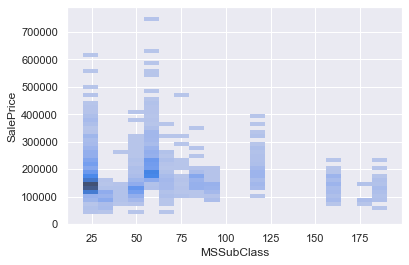

In [95]:
sns.histplot(data=train, x='MSSubClass', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

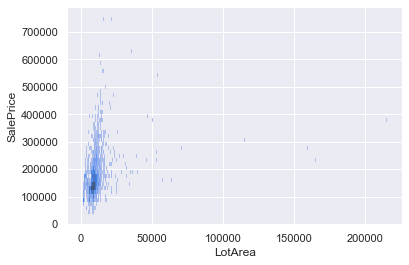

In [126]:
sns.histplot(data=train, y='SalePrice', x='LotArea', color=colors[0])

In [435]:
train = outlier(train, 'LotArea', 'mn')

In [362]:
test_x = outlier(test_x, 'LotArea', 'mn')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

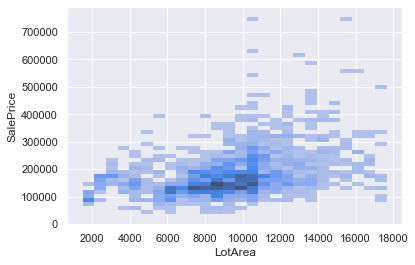

In [120]:
sns.histplot(data=train, y='SalePrice', x='LotArea', color=colors[0])

In [107]:
correlation(train, 'LotArea')

Корреляция признаков LotArea и SalePrice = 0.41 (умеренная)


Из категории общих сведений наиболее подходящими для обучения модели оказались: **LotArea** (умеренная) и **Neighborhood** (высокая)

---

### Окрестности 

LotFrontage: площадь дороги прилегающей к недвижимости

Street: тип подъездной дороги

PavedDrive: асфальтированная дорога

Alley: тип доступа к аллее

Condition1: близость к главной дороге или железной дороге

Condition2: близость к главной дороге или железной дороге (при наличии второй)

In [70]:
for name in ('LotFrontage', 'Street', 'PavedDrive', 'Alley', 'Condition1', 'Condition2'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака LotFrontage: 259
Тип признака LotFrontage: float64
Количество пропусков признака Street: 0
Тип признака Street: object
Количество пропусков признака PavedDrive: 0
Тип признака PavedDrive: object
Количество пропусков признака Alley: 1369
Тип признака Alley: object
Количество пропусков признака Condition1: 0
Тип признака Condition1: object
Количество пропусков признака Condition2: 0
Тип признака Condition2: object


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

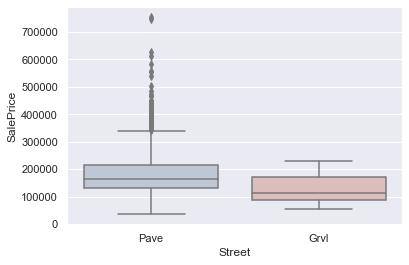

In [71]:
sns.boxplot(data=train, x='Street', y='SalePrice', palette="vlag")

In [81]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

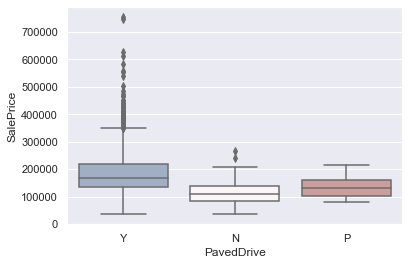

In [82]:
sns.boxplot(data=train, x='PavedDrive', y='SalePrice', palette="vlag")

In [83]:
train['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

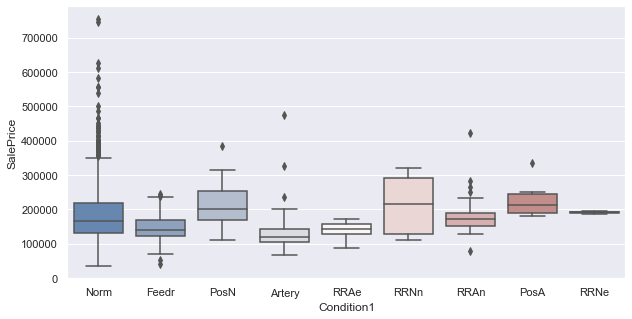

In [93]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='Condition1', y='SalePrice', palette="vlag")

In [85]:
train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

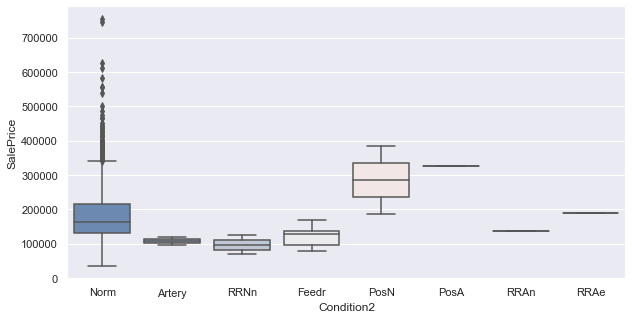

In [94]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='Condition2', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

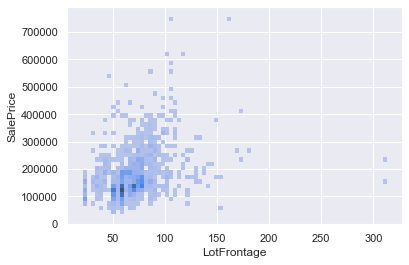

In [96]:
sns.histplot(data=train, y='SalePrice', x='LotFrontage', color=colors[0])

In [277]:
train = outlier(train, 'LotFrontage', 'me')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

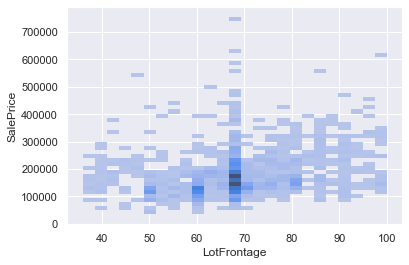

In [122]:
sns.histplot(data=train, y='SalePrice', x='LotFrontage', color=colors[0])

In [113]:
correlation(train, 'LotFrontage')

Корреляция признаков LotFrontage и SalePrice = 0.35 (умеренная)


In [114]:
mn = train['LotFrontage'].mean()
train['LotFrontage'] = train['LotFrontage'].fillna(mn)

Из категории окрестности единственный признак, который мог бы использоваться для обучения модели это LotFrontage (умеренная), однако много пропусков и корреляция не настолько высока.

---

### Качество
#### OverallQual
##### (Общее качество материала и отделки)

In [62]:
count_nan(train, 'OverallQual')
ctype(train, 'OverallQual')

Количество пропусков признака OverallQual: 0
Тип признака OverallQual: int64


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

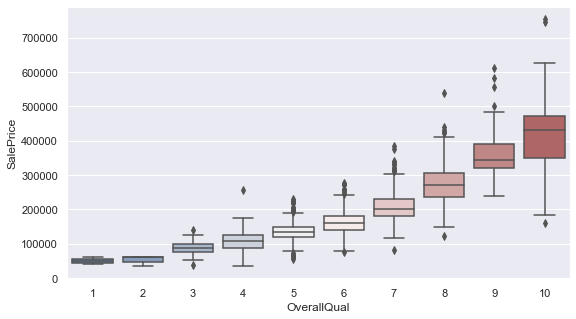

In [124]:
f, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=train, x='OverallQual', y='SalePrice', palette="vlag")

In [123]:
correlation(train, 'OverallQual')

Корреляция признаков OverallQual и SalePrice = 0.79 (высокая)


---

#### OverallCond, TotRmsAbvGrd, Functional, ExterQual, ExterCond, LowQualFinSF, Fence
##### (Общая оценка состояния, всего комнат выше класса, рейтинг домашней функциональности, качество материалов экстерьера, текущее состояние материала снаружи, площадь с отделкой низкого качества (все этажи, в квадратных футах), качество забора)

In [88]:
for name in ('OverallCond', 'TotRmsAbvGrd', 'Functional', 
             'ExterQual', 'ExterCond', 'LowQualFinSF', 'Fence'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака OverallCond: 0
Тип признака OverallCond: int64
Количество пропусков признака TotRmsAbvGrd: 0
Тип признака TotRmsAbvGrd: int64
Количество пропусков признака Functional: 0
Тип признака Functional: object
Количество пропусков признака ExterQual: 0
Тип признака ExterQual: object
Количество пропусков признака ExterCond: 0
Тип признака ExterCond: object
Количество пропусков признака LowQualFinSF: 0
Тип признака LowQualFinSF: int64
Количество пропусков признака Fence: 1179
Тип признака Fence: object


<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

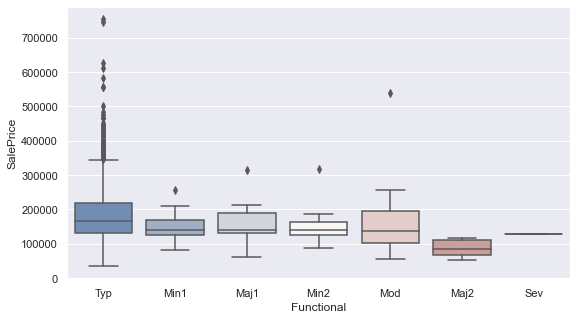

In [127]:
f, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=train, x='Functional', y='SalePrice', palette='vlag')

In [65]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

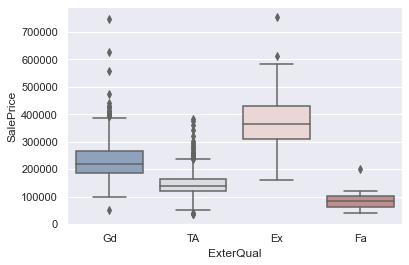

In [128]:
sns.boxplot(data=train, x='ExterQual', y='SalePrice', palette='vlag')

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

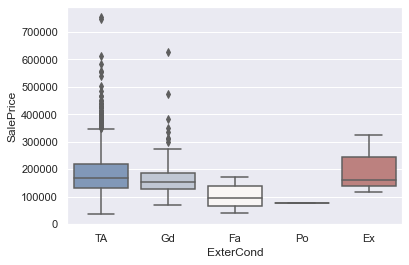

In [129]:
sns.boxplot(data=train, x='ExterCond', y='SalePrice', palette='vlag')

In [68]:
train['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

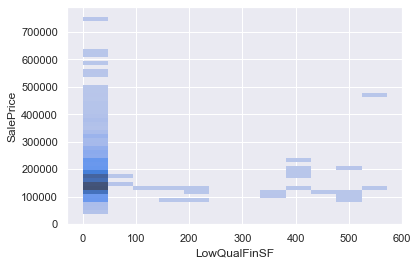

In [130]:
sns.histplot(data=train, x='LowQualFinSF', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

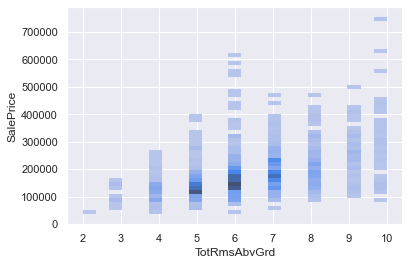

In [137]:
sns.histplot(data=train, x='TotRmsAbvGrd', y='SalePrice', color=colors[0])

In [18]:
train = outlier(train, 'TotRmsAbvGrd', 'mn')

In [364]:
test_x = outlier(test_x, 'TotRmsAbvGrd', 'mn')

In [19]:
correlation(train, 'TotRmsAbvGrd')

Корреляция признаков TotRmsAbvGrd и SalePrice = 0.48 (умеренная)


Первичный вывод по качеству и состоянию на текущий момент: ExterQual необходимо сделать числовым и посмотеть корреляцию, предполагаемо средняя, признак TotRmsAbvGrd имеет умеренную корреляцию с целевым признаком

In [20]:
train['ExterQual'] = train['ExterQual'].map({'Fa' : 0, 'TA' : 1, 'Gd' : 2, 'Ex' : 3}, na_action='ignore')

In [21]:
test_x['ExterQual'] = test_x['ExterQual'].map({'Fa' : 0, 'TA' : 1, 'Gd' : 2, 'Ex' : 3}, na_action='ignore')

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

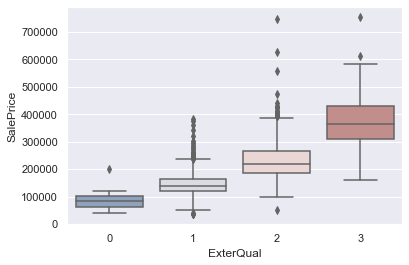

In [139]:
sns.boxplot(data=train, x='ExterQual', y='SalePrice', palette='vlag')

In [22]:
correlation(train, 'ExterQual')

Корреляция признаков ExterQual и SalePrice = 0.68 (средняя)


<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

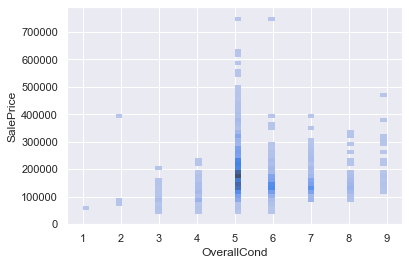

In [131]:
sns.histplot(data=train, x='OverallCond', y='SalePrice', color=colors[0])

In [74]:
train['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Общий вывод: OverallCond имеет слишком много средних оценок и диапазон стоимости большой для средних оценок, таким образом, для обучения не подходит. Остаются признаки **ExterQual** со средней, близкой к высокой, корреляцией с целевым признаком, и **TotRmsAbvGrd** со средней корреляцией. 

---

### YearBuilt и YearRemodAdd
#### (Первоначальная дата постройки, дата переделки)

In [76]:
for name in ('YearBuilt', 'YearRemodAdd'):
    count_nan(train, name)

Количество пропусков признака YearBuilt: 0
Количество пропусков признака YearRemodAdd: 0


In [171]:
mask = np.triu(train[['YearBuilt', 'YearRemodAdd', 'SalePrice']].corr())

<AxesSubplot:>

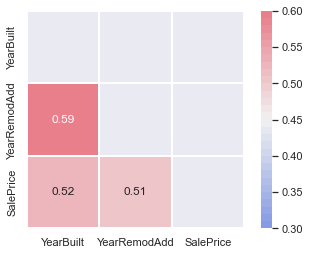

In [172]:
sns.heatmap(data=train[['YearBuilt', 'YearRemodAdd', 'SalePrice']].corr(),
           mask=mask, linewidths=2, vmin=0.3, vmax=.6, annot=True, square=True, cmap=cmap)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

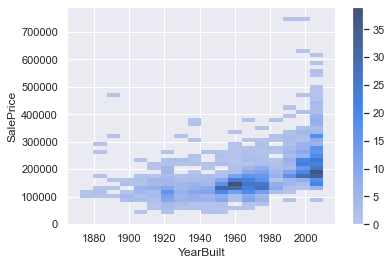

In [146]:
sns.histplot(data=train, x='YearBuilt', y='SalePrice', cbar=True, color=colors[0])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

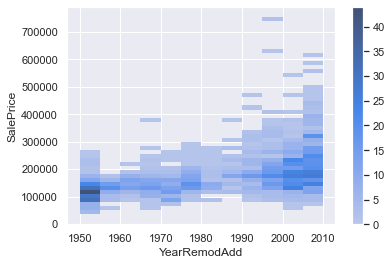

In [147]:
sns.histplot(data=train, x='YearRemodAdd', y='SalePrice', cbar=True, color=colors[0])

Таким образом для обучения модели остается признак **YearBuilt**, т.к. корреляция с целевым признаком выше и признак YearRemodAdd имеет ярко выраженное скопление в 50х годах и строительство в 50-60х

---

### Внешняя отделка дома
#### Foundation, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, RoofStyle, RoofMatl
##### (Тип фундамента, внешнее покрытие дома, внешнее покрытие дома (если более одного материала), тип каменной кладки, площадь каменной кладки в квадратных футах, тип крыши, материал крыши)

In [78]:
for name in ('Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
             'MasVnrArea', 'RoofStyle', 'RoofMatl'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака Foundation: 0
Тип признака Foundation: object
Количество пропусков признака Exterior1st: 0
Тип признака Exterior1st: object
Количество пропусков признака Exterior2nd: 0
Тип признака Exterior2nd: object
Количество пропусков признака MasVnrType: 8
Тип признака MasVnrType: object
Количество пропусков признака MasVnrArea: 8
Тип признака MasVnrArea: float64
Количество пропусков признака RoofStyle: 0
Тип признака RoofStyle: object
Количество пропусков признака RoofMatl: 0
Тип признака RoofMatl: object


<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

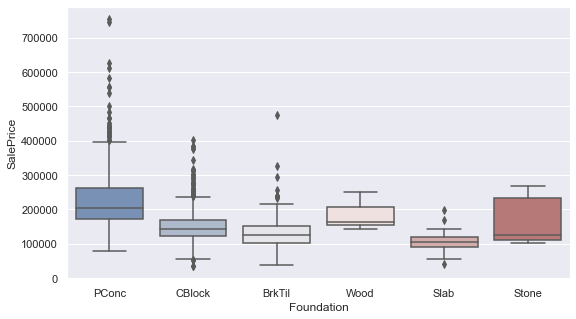

In [148]:
f, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=train, x='Foundation', y='SalePrice', palette='vlag')

In [85]:
train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [23]:
train['Foundation'] = train['Foundation'].map({'Slab' : 0, 'BrkTil' : 1, 'Stone' : 1, 'Wood' : 1, 
                                                 'CBlock' : 2, 'PConc' : 3}, na_action='ignore')

In [24]:
test_x['Foundation'] = test_x['Foundation'].map({'Slab' : 0, 'BrkTil' : 1, 'Stone' : 1, 'Wood' : 1, 
                                                 'CBlock' : 2, 'PConc' : 3}, na_action='ignore')

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

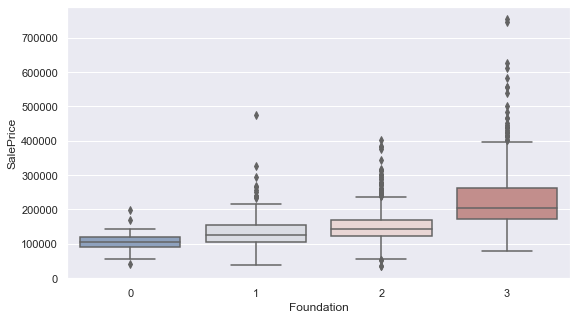

In [150]:
f, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=train, x='Foundation', y='SalePrice', palette='vlag')

In [117]:
correlation(train, 'Foundation')

Корреляция признаков Foundation и SalePrice = 0.47 (умеренная)


<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

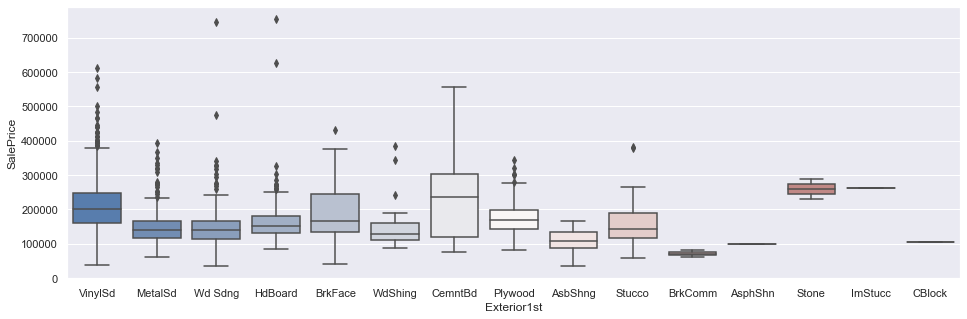

In [151]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=train, x='Exterior1st', y='SalePrice', palette='vlag')

In [99]:
train['Exterior1st'].value_counts().head(6)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
Name: Exterior1st, dtype: int64

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

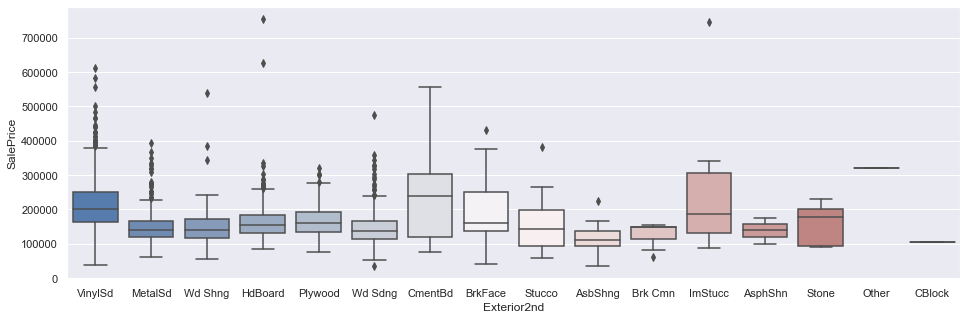

In [152]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=train, x='Exterior2nd', y='SalePrice', palette='vlag')

In [104]:
train['Exterior2nd'].value_counts().head(6)

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Name: Exterior2nd, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

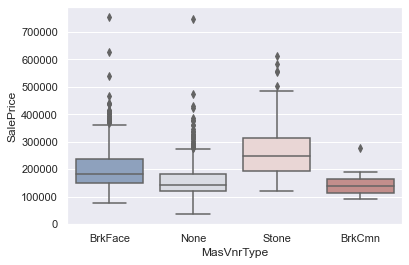

In [153]:
sns.boxplot(data=train, x='MasVnrType', y='SalePrice', palette='vlag')

In [107]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [441]:
train['MasVnrType'] = train['MasVnrType'].map({'BrkCmn' : 0, 'None' : 1, 'Stone' : 2, 'BrkFace' : 3}, na_action='ignore')

In [111]:
correlation(train, 'MasVnrType')

Корреляция признаков MasVnrType и SalePrice = 0.31 (умеренная)


<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

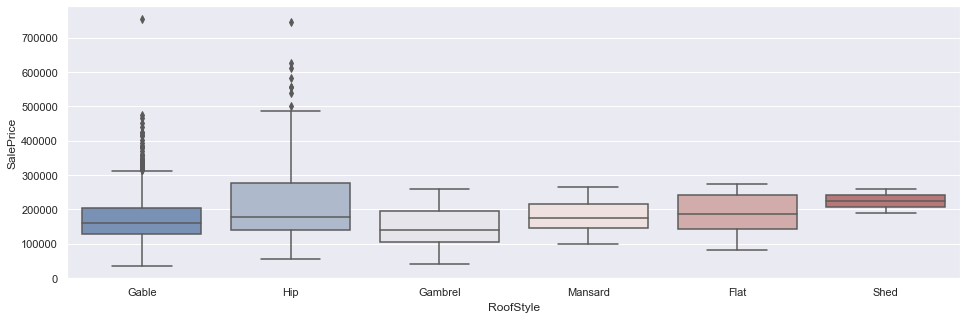

In [154]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=train, x='RoofStyle', y='SalePrice', palette='vlag')

In [114]:
train['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

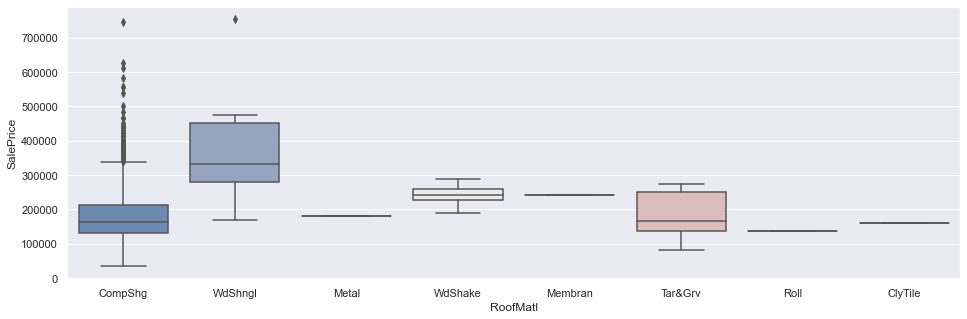

In [155]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=train, x='RoofMatl', y='SalePrice', palette='vlag')

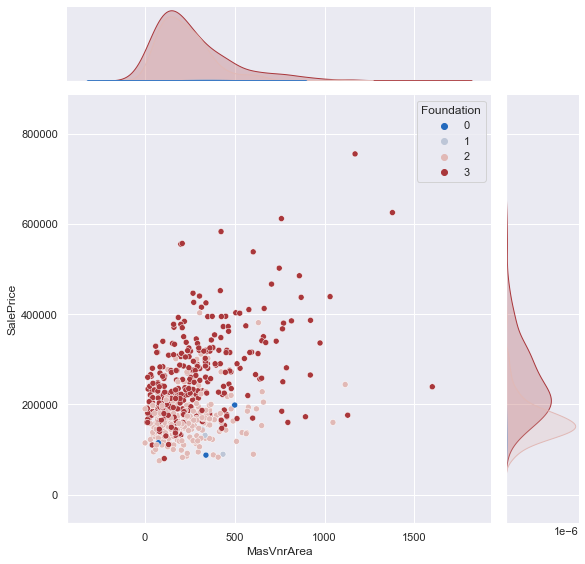

In [156]:
sns.jointplot(data=train[train.MasVnrArea != 0], x='MasVnrArea', y='SalePrice', 
              hue='Foundation', height=8, palette='vlag')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

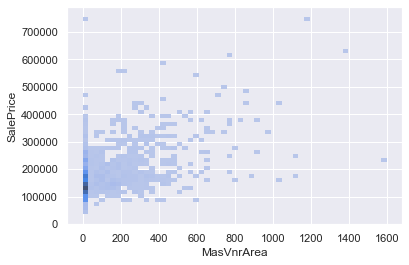

In [157]:
sns.histplot(data=train, x='MasVnrArea', y='SalePrice', color=colors[0])

In [153]:
train['MasVnrArea'][train.MasVnrArea == 0].count()/n

0.5897260273972603

In [137]:
correlation(train[train.MasVnrArea != 0], 'MasVnrArea')

Корреляция признаков MasVnrArea и SalePrice = 0.43 (умеренная)


Таким образом, из категории внешней отделки дома для обучения модели будут оставлены следующие признаки: **Foundation** (умеренная, близкая к средней), мог быть полезен MasVnrArea (умеренная корреляция с целевым признаком), но в типе фундамента уже учтен этот признак, не имеет смысла его оставлять, также много значений 0 (больше половины)

---

###  Жилая площадь
#### GrLivArea
##### (жилая площадь квадратных футах)

In [28]:
count_nan('GrLivArea')

Количество пропусков: 0


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

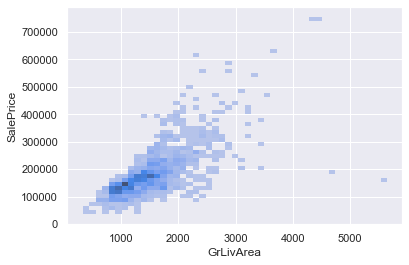

In [158]:
sns.histplot(data=train, x='GrLivArea', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='GrLivArea'>

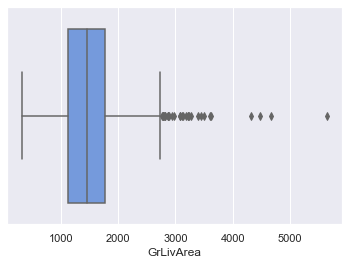

In [159]:
sns.boxplot(data=train, x='GrLivArea', color=colors[0])

In [25]:
train = outlier(train, 'GrLivArea', 'me')

In [443]:
test_x = outlier(test_x, 'GrLivArea', 'me')

In [101]:
correlation(train, 'GrLivArea')

Корреляция признаков GrLivArea и SalePrice = 0.62 (средняя)


---

### TotalBsmtSF, 1stFlrSF и 2ndFlrSF
##### (Общая площадь подвала в квадратных футах, квадратные футы первого этажа, квадратные футы второго этажа)


In [61]:
for name in ('TotalBsmtSF', '1stFlrSF', '2ndFlrSF'):
    count_nan(train, name)

Количество пропусков признака TotalBsmtSF: 0
Количество пропусков признака 1stFlrSF: 0
Количество пропусков признака 2ndFlrSF: 0


In [27]:
train.rename(columns={"1stFlrSF": "firstFlr", "2ndFlrSF": "secondFlr"}, inplace=True)

In [174]:
mask = np.triu(train[['GrLivArea', 'TotalBsmtSF', 'firstFlr', 'secondFlr', 'SalePrice']].corr())

<AxesSubplot:>

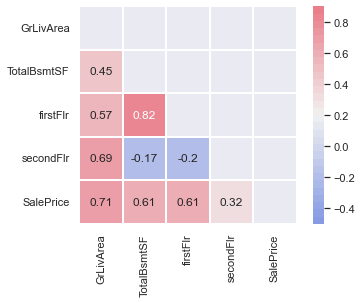

In [175]:
sns.heatmap(data=train[['GrLivArea', 'TotalBsmtSF', 'firstFlr', 'secondFlr', 'SalePrice']].corr(), 
            mask=mask, linewidths=2, vmin=-.5, vmax=.9, annot=True, square=True, cmap=cmap)

In [28]:
for name in ('TotalBsmtSF', 'firstFlr', 'secondFlr'):
    train=outlier(train, name, 'me')

In [446]:
test_x = outlier(test_x, 'TotalBsmtSF', 'me')

---

##### Доля домов без второго этажа:

In [65]:
round(train['secondFlr'][train.secondFlr==0].count()/n, 2)

0.57

<AxesSubplot:>

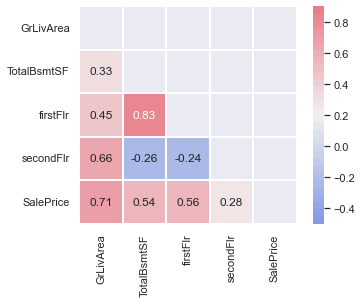

In [178]:
sns.heatmap(data=train[['GrLivArea', 'TotalBsmtSF', 'firstFlr', 'secondFlr', 'SalePrice']].corr(), 
            mask=mask, linewidths=2, vmin=-.5, vmax=.9, annot=True, square=True, cmap=cmap)

Корреляция признака secondFlr с другими, при условии, что второй этаж есть:

In [46]:
train[['GrLivArea', 'TotalBsmtSF', 'firstFlr', 'secondFlr', 'SalePrice']][train.secondFlr>0].corr().iloc[3:4]

,GrLivArea,TotalBsmtSF,firstFlr,secondFlr,SalePrice
secondFlr,0.789598,0.45949,0.424326,1.0,0.648166


'GrLivArea', 'TotalBsmtSF', '1stFlrSF' и '2ndFlrSF' все эти признаки говорят о жилой площади и подвальной, таким образом можно оставить только 2 из них, а именно: **GrLivArea** и **TotalBsmtSF**, потому как у первого выбранного признака наибольшая корреляция с целевым признаком (с остальными из группы средняя) и наименьшая со вторым выбранным признаком, который в свою очередь имеет сильную корреляцию с '1stFlrSF' и среднюю с целевым признаком

---

### Подвал
BsmtQual: Высота подвала

BsmtCond: Общее состояние подвала

BsmtExposure: стены подвала на уровне сада

BsmtFinType1: Качество отделки цокольного этажа

BsmtFinSF1: тип 1 с отделкой в квадратных футах

BsmtFinType2: Качество второй готовой области (если присутствует)

BsmtFinSF2: тип 2 с отделкой в квадратных футах

BsmtUnfSF: Незавершенные квадратные футы цокольного этажа

TotalBsmtSF: Общая площадь подвала в квадратных футах (уже рассматривался ранее, здесь для возможного поглощения других признаков)

In [168]:
for name in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
             'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака BsmtQual: 37
Тип признака BsmtQual: object
Количество пропусков признака BsmtCond: 37
Тип признака BsmtCond: object
Количество пропусков признака BsmtExposure: 38
Тип признака BsmtExposure: object
Количество пропусков признака BsmtFinType1: 37
Тип признака BsmtFinType1: object
Количество пропусков признака BsmtFinSF1: 0
Тип признака BsmtFinSF1: int64
Количество пропусков признака BsmtFinType2: 38
Тип признака BsmtFinType2: object
Количество пропусков признака BsmtFinSF2: 0
Тип признака BsmtFinSF2: int64
Количество пропусков признака BsmtUnfSF: 0
Тип признака BsmtUnfSF: int64
Количество пропусков признака TotalBsmtSF: 0
Тип признака TotalBsmtSF: int64


<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

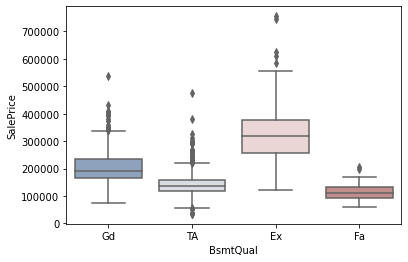

In [158]:
sns.boxplot(data=train, x='BsmtQual', y='SalePrice', palette='vlag')

In [31]:
train['BsmtQual'] = train['BsmtQual'].map({'Fa' : 0, 'TA' : 1, 'Gd' : 2, 'Ex' : 3}, na_action='ignore')

In [32]:
test_x['BsmtQual'] = test_x['BsmtQual'].map({'Fa' : 0, 'TA' : 1, 'Gd' : 2, 'Ex' : 3}, na_action='ignore')

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

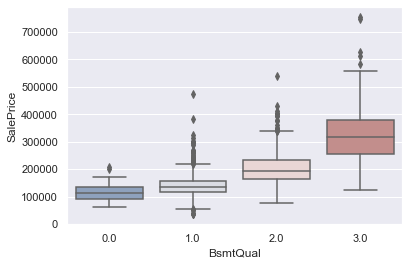

In [180]:
sns.boxplot(data=train, x='BsmtQual', y='SalePrice', palette='vlag')

In [33]:
me = train['BsmtQual'].median()
train['BsmtQual'] = train['BsmtQual'].fillna(me)

In [34]:
correlation(train, 'BsmtQual')

Корреляция признаков BsmtQual и SalePrice = 0.62 (средняя)


<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

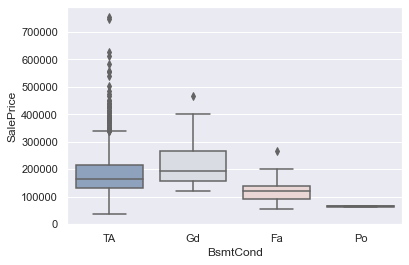

In [181]:
sns.boxplot(data=train, x='BsmtCond', y='SalePrice', palette='vlag')

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

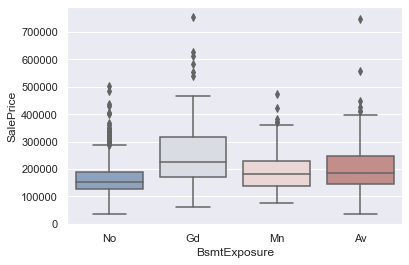

In [182]:
sns.boxplot(data=train, x='BsmtExposure', y='SalePrice', palette='vlag')

In [163]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

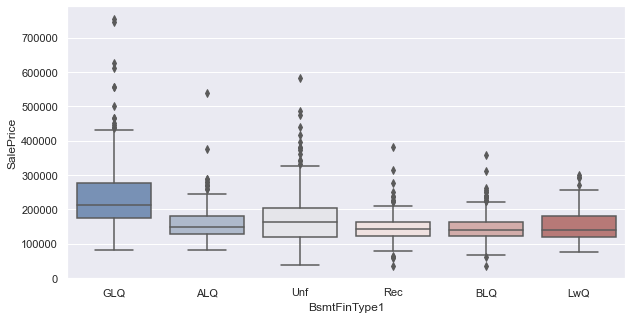

In [183]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='BsmtFinType1', y='SalePrice', palette='vlag')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

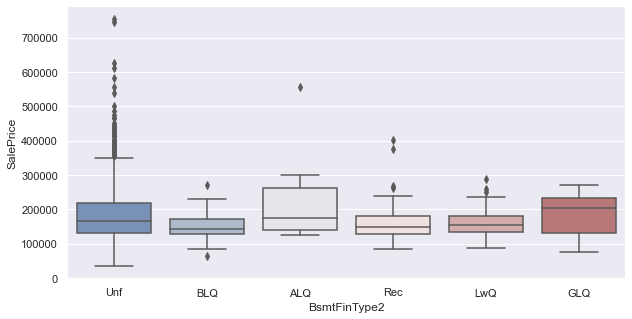

In [184]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train, x='BsmtFinType2', y='SalePrice', palette='vlag')

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

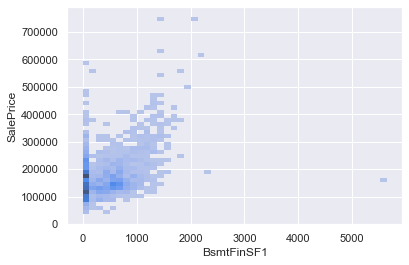

In [185]:
sns.histplot(data=train, x='BsmtFinSF1', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='BsmtFinSF1'>

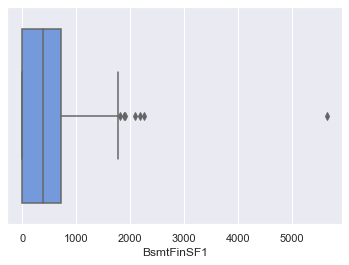

In [186]:
sns.boxplot(data=train, x='BsmtFinSF1', color=colors[0])

In [174]:
train['BsmtFinSF1'][train.BsmtFinSF1 == 0].count()/n

0.3198630136986301

In [182]:
correlation(train[(train.BsmtFinSF1 != 0)&(train.BsmtFinSF1 < 2000)], 'BsmtFinSF1')

Корреляция признаков BsmtFinSF1 и SalePrice = 0.5 (средняя)


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

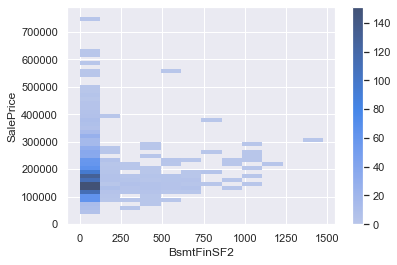

In [187]:
sns.histplot(data=train, x='BsmtFinSF2', y='SalePrice', cbar=True, color=colors[0])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

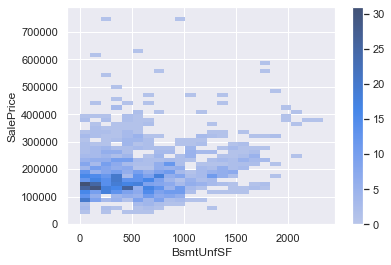

In [188]:
sns.histplot(data=train, x='BsmtUnfSF', y='SalePrice', cbar=True, color=colors[0])

In [193]:
correlation(train, 'BsmtUnfSF')

Корреляция признаков BsmtUnfSF и SalePrice = 0.21 (слабая)


Из категории признаков, касающихся подвала, полезными для модели могут быть только BsmtQual, BsmtFinSF1 и TotalBsmtSF, однако второму необходима обработка выбросов и замена значений 0. 

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='TotalBsmtSF'>

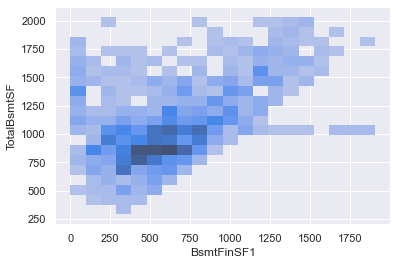

In [189]:
sns.histplot(data=train[(train.BsmtFinSF1 != 0)&(train.BsmtFinSF1 < 2000)], 
             x='BsmtFinSF1', y='TotalBsmtSF', color=colors[0])

In [205]:
correlation(train[(train.BsmtFinSF1 > 100)&(train.BsmtFinSF1 < 2000)], 
            'BsmtFinSF1', 'TotalBsmtSF')

Корреляция признаков BsmtFinSF1 и TotalBsmtSF = 0.65 (средняя)


В итоге остаются признаки: **TotalBsmtSF** (средняя) и **BsmtQual** (средняя, близкая к высокой); в признаке BsmtFinSF1 нет необходимости, т.к. у него средняя, близкая к высокой, корреляция с TotalBsmtSF после обработки

---

### Гараж 
#### (GarageCars - 0.64, GarageArea - 0.62, GarageYrBlt - 0.49, GarageCond, GarageFinish, GarageQual, GarageType)

#### GarageCars, GarageArea и GarageYrBlt
##### (Количество мест для автомобилей, площадь гаража в квадратных футах и год постройки)

In [43]:
for name in ('GarageCars','GarageArea','GarageYrBlt'):
    count_nan(train, name)

Количество пропусков признака GarageCars: 0
Количество пропусков признака GarageArea: 0
Количество пропусков признака GarageYrBlt: 81


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

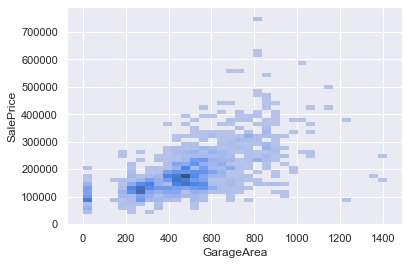

In [190]:
sns.histplot(data=train, x='GarageArea', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='GarageArea'>

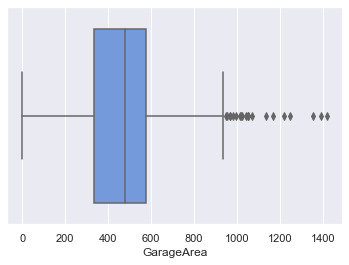

In [191]:
sns.boxplot(data=train, x='GarageArea', color=colors[0])

In [35]:
train = outlier(train, 'GarageArea', 'mn')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

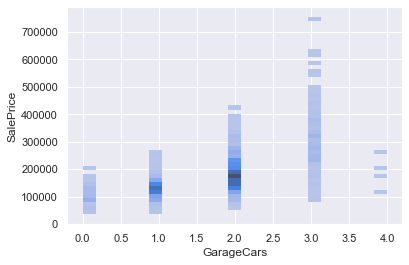

In [192]:
sns.histplot(data=train, x='GarageCars', y='SalePrice', color=colors[0])

In [22]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars'>

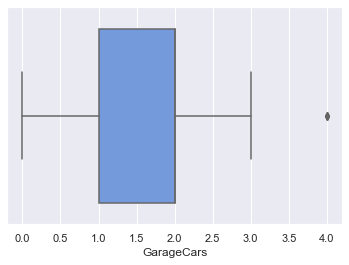

In [193]:
sns.boxplot(data=train, x='GarageCars', color=colors[0])

In [36]:
train = outlier(train, 'GarageCars', 'me')

In [21]:
train[['GarageCars', 'GarageArea', 'GarageYrBlt', 'SalePrice']].corr()[3:]

,GarageCars,GarageArea,GarageYrBlt,SalePrice
SalePrice,0.648977,0.6014,0.486362,1.0


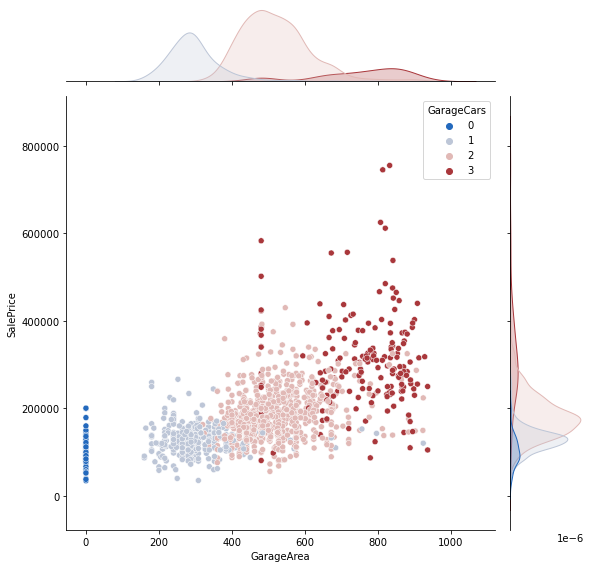

In [16]:
sns.jointplot(data=train, x='GarageArea', y='SalePrice', hue='GarageCars', height=8, palette="vlag")

In [37]:
train['GarageCars'] = train['GarageCars'].apply(lambda x: 1 if x==0 else x)

In [38]:
test_x['GarageCars'] = test_x['GarageCars'].apply(lambda x: 1 if x==0 else x)

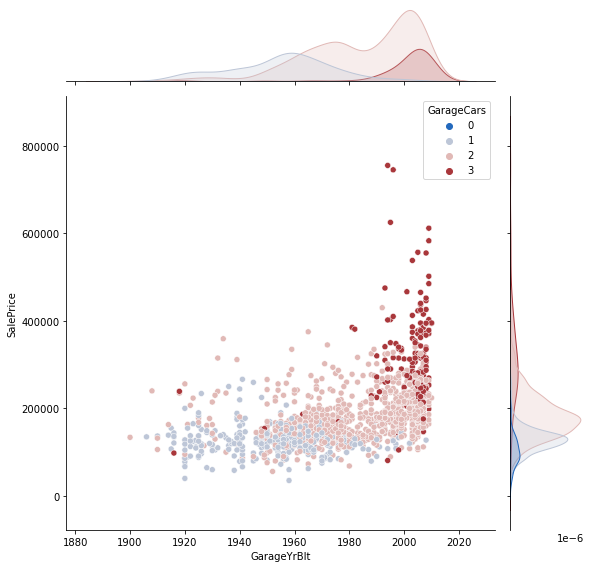

In [14]:
sns.jointplot(data=train, x='GarageYrBlt', y='SalePrice', hue='GarageCars', height=8, palette="vlag")

Можно заметить, что практически для каждого года строились здания с одним гаражом, стоимость которых ниже остальных, немного позже строились дома с двумя гаражами, стоимость которых немного выше, чем тех, в которых один гараж. Самые поздние постройки с тремя гаражами, стоимость которых самая высокая. Таким образом сам по себе признак года не говорит о стоимости, ведь размах слишком большой, разве что ближе к настоящему времени больше домов с гаражами и их количеством, но это уже учтено в признаке GarageCars.
Также стоит оставить один из признаков GarageCars или GarageArea с наибольшей корреляцией с SalePrice, т.к. они означают одно и то же, площадь зависит от количества гаражей. Было убрано значение 4 для признака GarageCars, ввиду маленького количества значений этой группы, также были объединены значения 0 и 1, т.к. ценовой размах одинаков и группа не многочисленная (81 эл.). Таким образом остается только один признак из группы GarageCars. 

In [99]:
correlation(train, 'GarageCars')

Корреляция признаков GarageCars и SalePrice = 0.66 (средняя)


#### GarageCond, GarageFinish, GarageQual и GarageType
##### (состояние гаража, внутренняя отделка гаража, качество гаража, расположение гаража)

In [44]:
for name in ('GarageCond','GarageFinish','GarageQual','GarageType'):
    count_nan(train, name)

Количество пропусков признака GarageCond: 81
Количество пропусков признака GarageFinish: 81
Количество пропусков признака GarageQual: 81
Количество пропусков признака GarageType: 81


<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

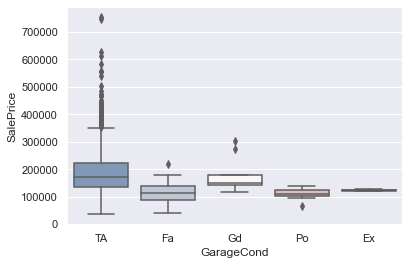

In [194]:
sns.boxplot(data=train, x='GarageCond', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='GarageCond', ylabel='Probability'>

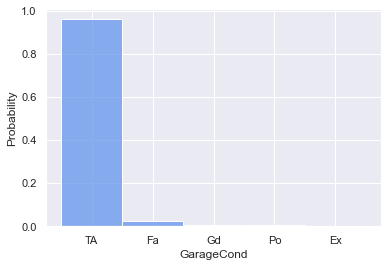

In [195]:
sns.histplot(data=train, x='GarageCond', stat='probability', color=colors[0])

---

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

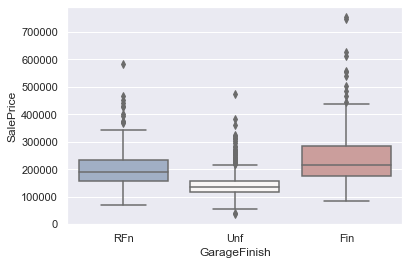

In [196]:
sns.boxplot(data=train, x='GarageFinish', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='GarageFinish', ylabel='Probability'>

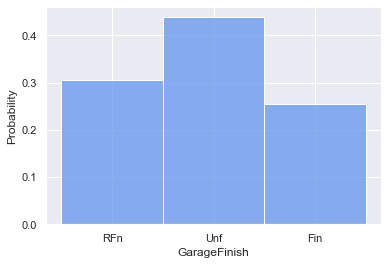

In [204]:
sns.histplot(data=train, x='GarageFinish', stat='probability', color=colors[0])

In [39]:
train['GarageFinish'] = train['GarageFinish'].map({'Unf' : 0, 'RFn' : 1, 'Fin' : 2}, na_action='ignore')

In [40]:
test_x['GarageFinish'] = test_x['GarageFinish'].map({'Unf' : 0, 'RFn' : 1, 'Fin' : 2}, na_action='ignore')

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

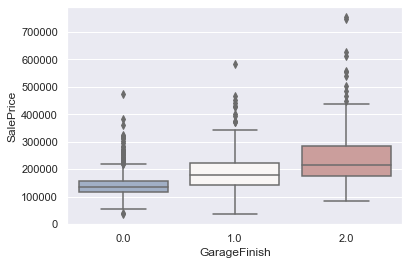

In [326]:
sns.boxplot(data=train, x='GarageFinish', y='SalePrice', palette='vlag')

In [41]:
me = train['GarageFinish'].median()
train['GarageFinish'] = train['GarageFinish'].fillna(me)

In [42]:
correlation(train, 'GarageFinish')

Корреляция признаков GarageFinish и SalePrice = 0.48 (умеренная)


---

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

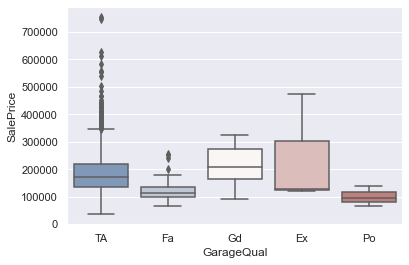

In [199]:
sns.boxplot(data=train, x='GarageQual', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='GarageQual', ylabel='Probability'>

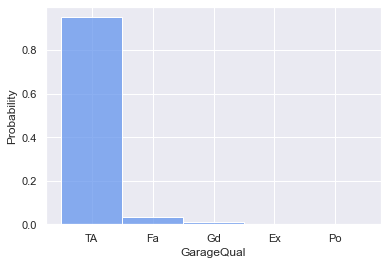

In [200]:
sns.histplot(data=train, x='GarageQual', stat='probability', color=colors[0])

--------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

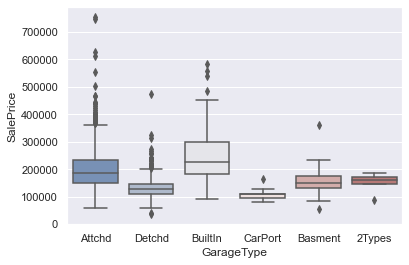

In [201]:
sns.boxplot(data=train, x='GarageType', y='SalePrice', palette="vlag")

<AxesSubplot:xlabel='GarageType', ylabel='Probability'>

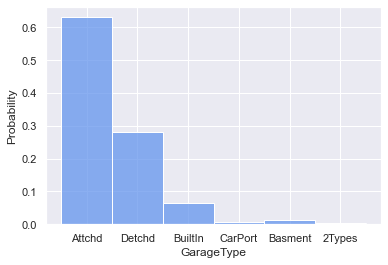

In [202]:
sns.histplot(data=train, x='GarageType', stat='probability', color=colors[0])

In [457]:
train['GarageType'] = train['GarageType'].map({'CarPort' : 0, '2Types' : 1, 'Basment' : 2, 
                                               'Detchd' : 3, 'BuiltIn' : 4, 'Attchd' : 5}, na_action='ignore')

In [59]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

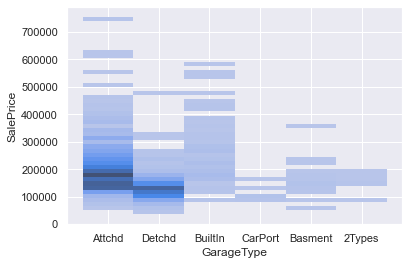

In [203]:
sns.histplot(data=train, x='GarageType', y='SalePrice', color=colors[0])

In [111]:
correlation(train, 'GarageType')

Корреляция признаков GarageType и SalePrice = 0.36 (умеренная)


-------------

Признак GarageCond не может использоваться для модели, т.к. слишком много значений 'TA' вероятность практически равна 1; признак GarageFinish имеет среднюю корреляция с целевым признаком (0.51); признак GarageQual ситуация аналогична с GarageCond; признак GarageType имеет умеренную корреляцию с целевым признаком (0.36), однако почти все значения имеют маленькие вероятности появления, кроме 'Detchd' и 'Attchd'

---

Общий вывод по признакам, касающихся гаража (GarageCars, GarageArea, GarageYrBlt, GarageCond, GarageFinish, GarageQual, GarageType) из этой группы остаются для обучения модели только **GarageCars** и **GarageFinish**.

---

### Ванные комнаты
#### FullBath, HalfBath, BsmtFullBath, BsmtHalfBath
##### (полностью оборудованные ванные комнаты выше уровня земли, полуванны выше уровня, ванные комнаты в подвале, полуванны в подвале)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

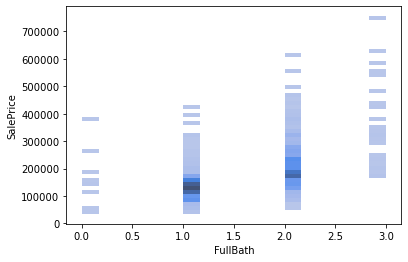

In [43]:
sns.histplot(data=train, x='FullBath', y='SalePrice', color=colors[0])

In [12]:
for name in ('FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'):
    count_nan(train, name)

Количество пропусков признака FullBath: 0
Количество пропусков признака HalfBath: 0
Количество пропусков признака BsmtFullBath: 0
Количество пропусков признака BsmtHalfBath: 0


In [15]:
mask = np.triu(train[['FullBath', 'HalfBath', 
                      'BsmtFullBath', 'BsmtHalfBath', 
                      'SalePrice']].corr())

<AxesSubplot:>

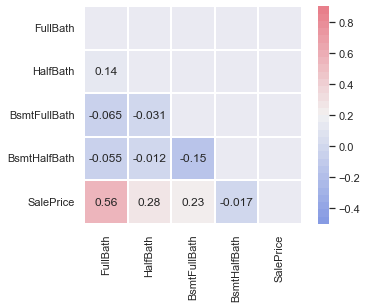

In [208]:
sns.heatmap(data=train[['FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 
                        'SalePrice']].corr(), 
            mask=mask, linewidths=2, vmin=-.5, vmax=.9, 
            annot=True, square=True, cmap=cmap)

Наибольшую корреляцию с целевым признаком имеет **FullBath**, остальные слабую либо очень слабую, таким образом для обучения модели остается FullBath (пропусков нет)

---

### Кухни
#### KitchenAbvGr и KitchenQual
##### (количество кухонь, качество)

In [34]:
for name in ('KitchenAbvGr', 'KitchenQual'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака KitchenAbvGr: 0
Тип признака KitchenAbvGr: int64
Количество пропусков признака KitchenQual: 0
Тип признака KitchenQual: int64


<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

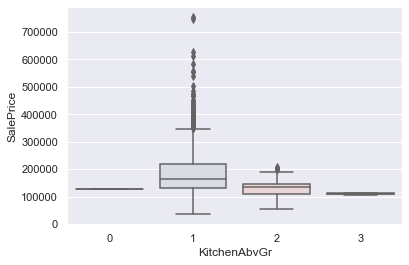

In [209]:
sns.boxplot(data=train, y='SalePrice', x='KitchenAbvGr', palette='vlag')

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

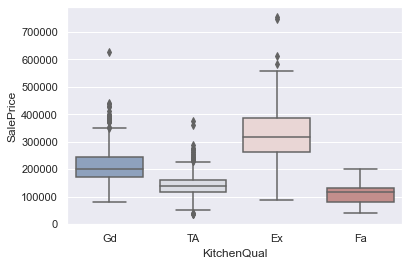

In [210]:
sns.boxplot(data=train, y='SalePrice', x='KitchenQual', palette='vlag')

In [20]:
train['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [44]:
train['KitchenQual'] = train['KitchenQual'].map({'Fa' : 0, 'TA' : 1,
                                                 'Gd' : 2, 'Ex' : 3}, na_action='ignore')

In [45]:
test_x['KitchenQual'] = test_x['KitchenQual'].map({'Fa' : 0, 'TA' : 1,
                                                   'Gd' : 2, 'Ex' : 3}, na_action='ignore')

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

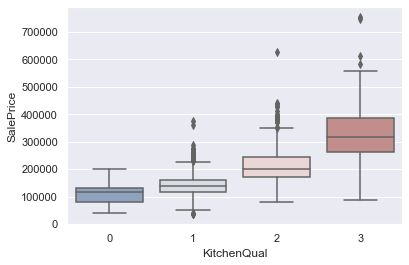

In [212]:
sns.boxplot(data=train, y='SalePrice', x='KitchenQual', palette='vlag')

In [30]:
correlation(train, 'KitchenQual')

Корреляция признаков KitchenQual и SalePrice = 0.66 (средняя)


Таким образом, наиболее подходящим является признак **KitchenQual** (средняя, близко к высокой) из категории кухня.

---

### Спальни
#### Bedroom
##### (количество спален выше цокольного этажа)

In [33]:
count_nan(train, 'BedroomAbvGr')
ctype(train, 'BedroomAbvGr')

Количество пропусков признака BedroomAbvGr: 0
Тип признака BedroomAbvGr: int64


<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Count'>

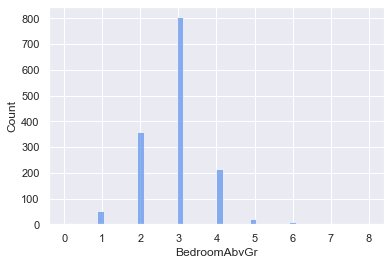

In [213]:
sns.histplot(data=train, x='BedroomAbvGr', color=colors[0])

Много значений 3 (больше половины, остальных значений не так много). Признак BedroomAbvGr не релевантен.

---

### Отопление, электричество, кондиционирование (доп. камины)
#### Heating, HeatingQC, CentralAir, Electrical
##### (тип отопления, качество, центральное кондиционирование воздуха, электрическая система)

In [39]:
for name in ('Heating', 'HeatingQC', 'CentralAir', 'Electrical'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака Heating: 0
Тип признака Heating: object
Количество пропусков признака HeatingQC: 0
Тип признака HeatingQC: object
Количество пропусков признака CentralAir: 0
Тип признака CentralAir: object
Количество пропусков признака Electrical: 1
Тип признака Electrical: object


<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

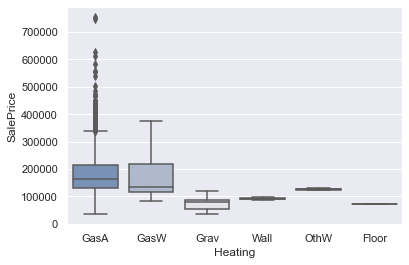

In [214]:
sns.boxplot(data=train, x='Heating', y='SalePrice', palette='vlag')

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

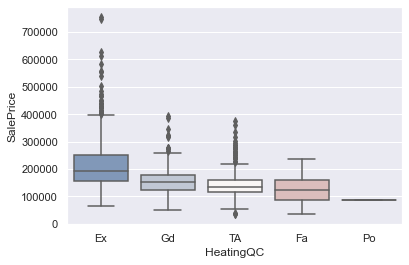

In [215]:
sns.boxplot(data=train, x='HeatingQC', y='SalePrice', palette='vlag')

In [46]:
train['HeatingQC'] = train['HeatingQC'].map({'Po' : 0, 'Fa' : 0, 'TA' : 1,
                                             'Gd' : 2, 'Ex' : 3}, na_action='ignore')

In [47]:
test_x['HeatingQC'] = test_x['HeatingQC'].map({'Po' : 0, 'Fa' : 0, 'TA' : 1,
                                               'Gd' : 2, 'Ex' : 3}, na_action='ignore')

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

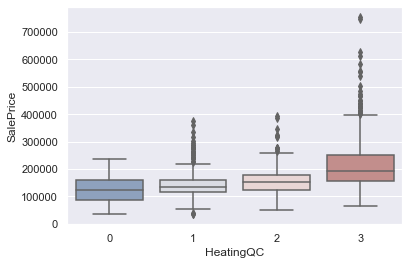

In [217]:
sns.boxplot(data=train, x='HeatingQC', y='SalePrice', palette='vlag')

In [49]:
correlation(train, 'HeatingQC')

Корреляция признаков HeatingQC и SalePrice = 0.43 (умеренная)


<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

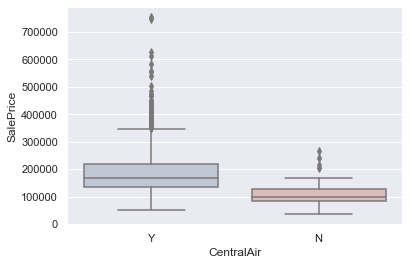

In [218]:
sns.boxplot(data=train, x='CentralAir', y='SalePrice', palette='vlag')

In [45]:
train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

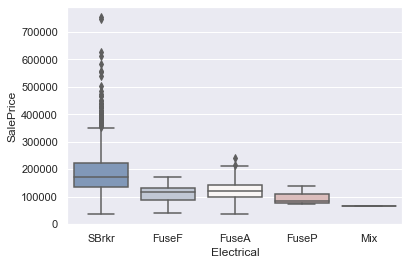

In [219]:
sns.boxplot(data=train, x='Electrical', y='SalePrice', palette='vlag')

In [47]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Из категории коммунального оснащения наиболее релевантен признак **HeatingQC** (с умеренной корреляцией, близкой к средней)

#### Fireplaces, FireplaceQu 
##### (количество и качество каминов)

In [50]:
for name in ('Fireplaces', 'FireplaceQu'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака Fireplaces: 0
Тип признака Fireplaces: int64
Количество пропусков признака FireplaceQu: 690
Тип признака FireplaceQu: object


<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

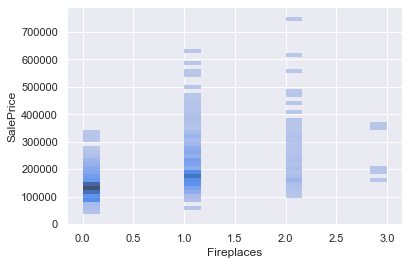

In [220]:
sns.histplot(data=train, x='Fireplaces', y='SalePrice', color=colors[0])

In [48]:
train['Fireplaces'] = train['Fireplaces'].apply(lambda x: 1 if x==3 else x)

In [49]:
test_x['Fireplaces'] = test_x['Fireplaces'].apply(lambda x: 1 if x==3 else x)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

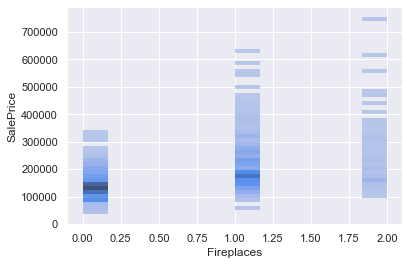

In [226]:
sns.histplot(data=train, x='Fireplaces', y='SalePrice', color=colors[0])

In [225]:
correlation(train, 'Fireplaces')

Корреляция признаков Fireplaces и SalePrice = 0.47 (умеренная)


<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

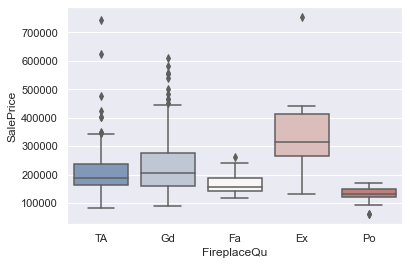

In [221]:
sns.boxplot(data=train, x='FireplaceQu', y='SalePrice', palette='vlag')

Признак **Fireplaces** имеет умеренную (близкую к средней) корреляцию с целевым признаком, таким образом, он может быть использован для обучения модели

---

### Крыльцо, веранда, терраса
#### WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch
##### (площадь из дерева, площадь открытой части, закрытая площадь, площадь для трех сезонов)

In [69]:
for name in ('WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака WoodDeckSF: 0
Тип признака WoodDeckSF: int64
Количество пропусков признака OpenPorchSF: 0
Тип признака OpenPorchSF: int64
Количество пропусков признака EnclosedPorch: 0
Тип признака EnclosedPorch: int64
Количество пропусков признака 3SsnPorch: 0
Тип признака 3SsnPorch: int64
Количество пропусков признака ScreenPorch: 0
Тип признака ScreenPorch: int64


In [227]:
mask = np.triu(train[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                      '3SsnPorch', 'ScreenPorch', 'SalePrice']].corr())

<AxesSubplot:>

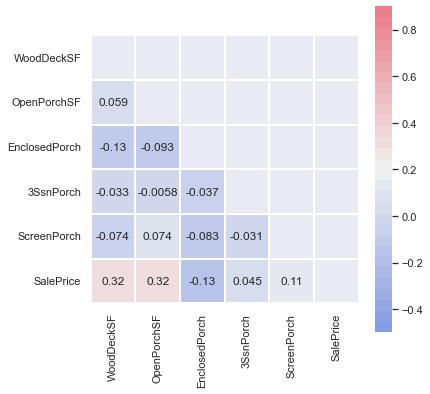

In [228]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data=train[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                          '3SsnPorch', 'ScreenPorch', 'SalePrice']].corr(), 
            mask=mask, linewidths=2, vmin=-.5, vmax=.9, annot=True, square=True, cmap=cmap)

In [50]:
for name in ('WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'):
    outlier(train, name, 'me')

<AxesSubplot:>

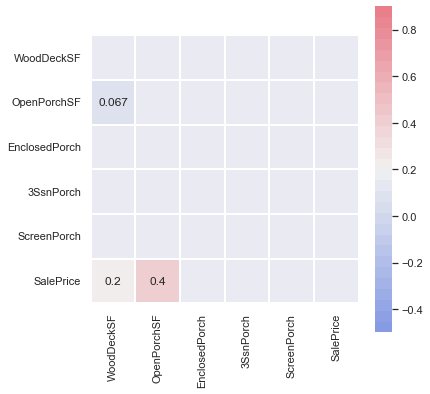

In [230]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data=train[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                        '3SsnPorch', 'ScreenPorch', 'SalePrice']][train.WoodDeckSF > 0].corr(), 
            mask=mask, linewidths=2, vmin=-.5, vmax=.9, annot=True, square=True, cmap=cmap)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

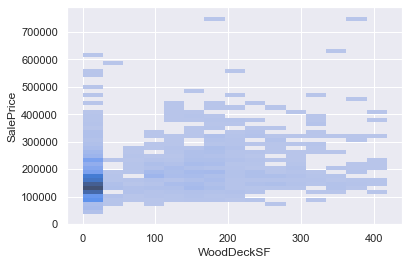

In [231]:
sns.histplot(data=train, x='WoodDeckSF', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

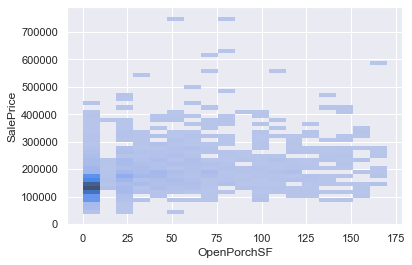

In [232]:
sns.histplot(data=train, x='OpenPorchSF', y='SalePrice', color=colors[0])

Для обучения модели может быть взят признак **OpenPorchSF**, учитывая, что его корреляция с целевым признаком возрастает, при значении WoodDeckSF > 0, он тоже учтен в выбранном признаке, остальные имеют очень слабую корреляцию

---

### Бассейн
#### PoolArea, PoolQC
##### (площадь и количество)

In [86]:
for name in ('PoolArea', 'PoolQC'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака PoolArea: 0
Тип признака PoolArea: int64
Количество пропусков признака PoolQC: 1453
Тип признака PoolQC: object


<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

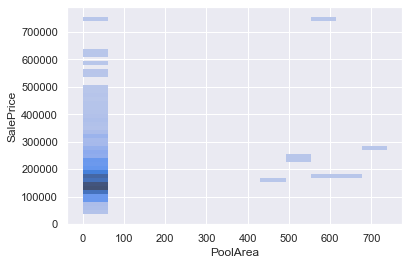

In [233]:
sns.histplot(data=train, x='PoolArea', y='SalePrice', color=colors[0])

Ни один из признаков не может быть использован для обучения модели

---

### Продажа
#### MoSold, YrSold, SaleType, SaleCondition
##### (месяц и год продажи, тип продажи, состояние продажи)

In [89]:
for name in ('MoSold', 'YrSold', 'SaleType', 'SaleCondition'):
    count_nan(train, name)
    ctype(train, name)

Количество пропусков признака MoSold: 0
Тип признака MoSold: int64
Количество пропусков признака YrSold: 0
Тип признака YrSold: int64
Количество пропусков признака SaleType: 0
Тип признака SaleType: object
Количество пропусков признака SaleCondition: 0
Тип признака SaleCondition: object


<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

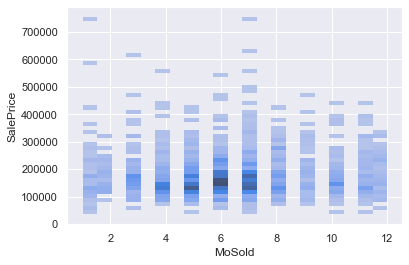

In [234]:
sns.histplot(data=train, x='MoSold', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

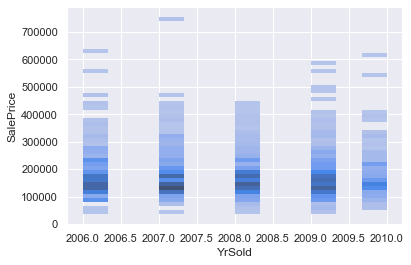

In [235]:
sns.histplot(data=train, x='YrSold', y='SalePrice', color=colors[0])

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

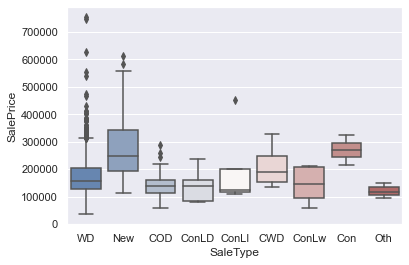

In [236]:
sns.boxplot(data=train, x='SaleType', y='SalePrice', palette='vlag')

In [94]:
train['SaleType'].value_counts().head(4)

WD       1267
New       122
COD        43
ConLD       9
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

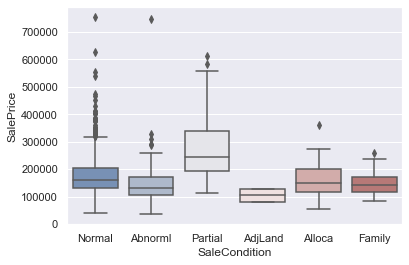

In [237]:
sns.boxplot(data=train, x='SaleCondition', y='SalePrice', palette='vlag')

In [96]:
train['SaleCondition'].value_counts().head(4)

Normal     1198
Partial     125
Abnorml     101
Family       20
Name: SaleCondition, dtype: int64

---

In [465]:
#первичный набор признаков
train_x = train[['LotArea', 'Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual',
                   'YearBuilt', 'Foundation', 'TotalBsmtSF', 'GrLivArea', 'BsmtQual',
                   'GarageFinish', 'GarageCars', 'FullBath', 'KitchenQual', 'HeatingQC',
                   'Fireplaces', 'OpenPorchSF']]

In [ ]:
test_X = test_x[['LotArea', 'Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual',
                  'YearBuilt', 'Foundation', 'TotalBsmtSF', 'GrLivArea', 'BsmtQual',
                  'GarageFinish', 'GarageCars', 'FullBath', 'KitchenQual', 'HeatingQC',
                  'Fireplaces', 'OpenPorchSF']]

In [51]:
#вторичный набор признаков
train_x = train[['Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual',
                 'Foundation', 'TotalBsmtSF', 'GrLivArea', 'BsmtQual',
                 'GarageFinish', 'GarageCars', 'FullBath', 'KitchenQual', 'HeatingQC',
                 'Fireplaces']]

In [ ]:
test_X = test_x[['Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual',
                 'Foundation', 'TotalBsmtSF', 'GrLivArea', 'BsmtQual',
                 'GarageFinish', 'GarageCars', 'FullBath', 'KitchenQual', 'HeatingQC',
                 'Fireplaces']]

In [80]:
train_h = train_x.join(train['SalePrice'])

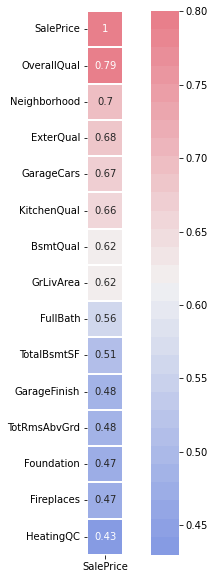

In [83]:
f, ax = plt.subplots(figsize=(10, 10))
corrmat = train_h.corr()
corrmat=corrmat.loc[['SalePrice']].T.sort_values(by='SalePrice', ascending=False).round(2)
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.2, cmap=cmap, annot=True);

In [52]:
train_x.head()

,Neighborhood,OverallQual,TotRmsAbvGrd,ExterQual,Foundation,TotalBsmtSF,GrLivArea,BsmtQual,GarageFinish,GarageCars,FullBath,KitchenQual,HeatingQC,Fireplaces
0,4,7,8,2,3,856,1710,2.0,1.0,2,2,2,3,0
1,5,6,6,1,2,1262,1262,2.0,1.0,2,2,1,3,1
2,4,7,6,2,3,920,1786,2.0,1.0,2,2,2,3,1
3,4,7,7,1,1,756,1717,1.0,0.0,3,1,2,2,1
4,6,8,9,2,3,1145,2198,2.0,1.0,3,2,2,3,1


In [54]:
test_X.head()

,Neighborhood,OverallQual,TotRmsAbvGrd,ExterQual,Foundation,TotalBsmtSF,GrLivArea,BsmtQual,GarageFinish,GarageCars,FullBath,KitchenQual,HeatingQC,Fireplaces
0,2,5,5,1,2,882.0,896,1.0,0.0,1.0,1,1.0,1,0
1,2,6,6,1,2,1329.0,1329,1.0,0.0,1.0,1,2.0,1,0
2,3,5,6,1,3,928.0,1629,2.0,2.0,2.0,2,1.0,2,1
3,3,6,7,1,3,926.0,1604,1.0,2.0,2.0,2,2.0,3,1
4,6,8,5,2,3,1280.0,1280,2.0,1.0,2.0,2,2.0,3,0


In [56]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   TotRmsAbvGrd  1460 non-null   int64  
 3   ExterQual     1460 non-null   int64  
 4   Foundation    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtQual      1460 non-null   float64
 8   GarageFinish  1460 non-null   float64
 9   GarageCars    1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  HeatingQC     1460 non-null   int64  
 13  Fireplaces    1460 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


In [55]:
test = test_X.join(test_y)

In [64]:
test = test.dropna()

In [59]:
test_y = test['SalePrice']

In [69]:
test_X = test.drop(['SalePrice', 'Id'], axis=1)

In [63]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1459 non-null   int64  
 1   OverallQual   1459 non-null   int64  
 2   TotRmsAbvGrd  1459 non-null   int64  
 3   ExterQual     1459 non-null   int64  
 4   Foundation    1459 non-null   int64  
 5   TotalBsmtSF   1458 non-null   float64
 6   GrLivArea     1459 non-null   int64  
 7   BsmtQual      1415 non-null   float64
 8   GarageFinish  1381 non-null   float64
 9   GarageCars    1458 non-null   float64
 10  FullBath      1459 non-null   int64  
 11  KitchenQual   1458 non-null   float64
 12  HeatingQC     1459 non-null   int64  
 13  Fireplaces    1459 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 159.7 KB


In [61]:
train_x[['BsmtQual', 'GarageFinish']] = train_x[['BsmtQual', 'GarageFinish']].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [65]:
test[['TotalBsmtSF', 'BsmtQual', 'GarageFinish', 'GarageCars', 'KitchenQual']] = test[['TotalBsmtSF', 'BsmtQual', 'GarageFinish', 'GarageCars', 'KitchenQual']].astype(int)

In [66]:
train_y = train[['SalePrice']]

In [67]:
rf = skle.RandomForestClassifier()
rf.fit(train_x, train_y)

C:\Users\User\AppData\Local\Temp/ipykernel_13576/2396214325.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


RandomForestClassifier()

In [70]:
pred_y = rf.predict(test_X)

In [71]:
print(mean_absolute_error(pred_y, test_y))

53967.50010828065


In [72]:
print(round(mean_absolute_error(pred_y, test_y)/test_y.mean()*100, 1), '%')

30.1 %


---

In [14]:
def count_nan(df, name):
    print(f"Количество пропусков признака {name}:", df[name].isna().sum())

In [15]:
def ctype(df, name):
    print(f"Тип признака {name}:", df[name].dtype)

In [16]:
def correlation(df, name1, name2='SalePrice'):
    corr = round(df[[name1, name2]].corr().iloc[0,1], 2)
    corr_abs = abs(corr)
    if corr_abs >= 0.7:
        comm = 'высокая'
    elif corr_abs >= 0.5:
        comm = 'средняя'
    elif corr_abs >= 0.3:
        comm = 'умеренная'
    elif corr_abs >= 0.2:
        comm = 'слабая'
    else:
        comm = 'очень слабая'
    print(f"Корреляция признаков {name1} и {name2} = {corr} ({comm})")

In [17]:
def outlier(df, name, p):
    q25, q75 = np.percentile(df[name].dropna(), [25, 75])
    iqr = q75 - q25
    mx = q75+(1.5*iqr)
    mn = q25-(1.5*iqr)
    if p == "me":
            p = int(df[name].median())
    elif p == "mn":
            p = int(df[name].mean())
    else:
        print('Неверное значение p для замены выбросов, выберите mn или me')
    df[name] = df[name].apply(lambda x: p if ((x < mn) | (x > mx)) else x)
#     df[name].dropna(inplace=True)
#     print(' Нижняя граница   = ', mn, '\n', 
#           'Нижний квартиль  = ', q25, '\n',
#           'Верхний квартиль = ', q75, '\n',
#           'Bерхняя граница  = ', mx)
    return df

In [9]:
!jt -r

Reset css and font defaults in:
C:\Users\User\.jupyter\custom &
C:\Users\User\AppData\Roaming\jupyter\nbextensions


In [7]:
!jt -t oceans16 -T